<div align="center">

# <span style="color: #3498db;">CA2 - Genetic & Game</span>

**<span style="color:rgb(247, 169, 0);">[Student Name]</span> - <span style="color:rgb(143, 95, 195);">[Student Number]</span>**

</div>


<div style="font-family: Arial, sans-serif; line-height: 1.6;">

### 📊 Matplotlib – Data Visualization in Python  

matplotlib is a python library that is mainly used for data visualization. This library allows you to plot different type of figures including scatters and histograms. In the first part of this project you are supposed to implement a genetic algorithm. To visualize plots that are required in the project description use plotting as much as you can because it gives a great insight on what is happening during each run. It also helps you to compare your results whenevever you want to understand effect of different parameters during different runs.
For more information, check [this notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) and visit [the website](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py).

In [3]:
import matplotlib.pyplot as plt

# <span style="color: #3498db;">Genetic Algorithm</span>

In [4]:
import random
import itertools
import numpy as np

In [5]:
# algorithm parameters
numCoeffs = 41
populationSize = 100
generations = 300
mutationRate = 0.15
functionRange = (-np.pi, np.pi)
sampleCount = 100

In [6]:
# These functions are given as samples to use in the algorithm
def getTargetFunction(functionName="sin_cos"):
    def sinCosFunction(t):
        """Target function: sin(2πt) + 0.5*cos(4πt)."""
        return np.sin(2 * np.pi * t) + 0.5 * np.cos(4 * np.pi * t)

    def linearFunction(t):
        """Simple linear function: y = 2t + 1."""
        return 2 * t + 1

    def quadraticFunction(t):
        """Quadratic function: y = 4t^2 - 4t + 2."""
        return 4 * (t**2) - 4 * t + 2

    def cubicFunction(t):
        """Cubic function: y = 8t^3 - 12t^2 + 6t."""
        return 8 * (t**3) - 12 * (t**2) + 6 * t

    def gaussianFunction(t):
        """Gaussian function centered at t=0.5."""
        mu = 0.5
        sigma = 0.1  # Adjust sigma to control the width of the peak
        return np.exp(-((t - mu) ** 2) / (2 * sigma**2))

    def squareWaveFunction(t):
        """Approximation of a square wave. Smoothed for better Fourier approximation."""
        return 0.5 * (np.sign(np.sin(2 * np.pi * t)) + 1)

    def sawtoothFunction(t):
        """Sawtooth wave, normalized to [0, 1]."""
        return (t * 5) % 1

    def complexFourierFunction(t):
        return (
            np.sin(2 * np.pi * t)
            + 0.3 * np.cos(4 * np.pi * t)
            + 0.2 * np.sin(6 * np.pi * t)
            + 0.1 * np.cos(8 * np.pi * t)
        )

    def polynomialFunction(t):
        return 10 * (t**5) - 20 * (t**4) + 15 * (t**3) - 4 * (t**2) + t + 0.5

    functionOptions = {
        "sin_cos": sinCosFunction,
        "linear": linearFunction,
        "quadratic": quadraticFunction,
        "cubic": cubicFunction,
        "gaussian": gaussianFunction,
        "square_wave": squareWaveFunction,
        "sawtooth": sawtoothFunction,
        "complex_fourier": complexFourierFunction,
        "polynomial": polynomialFunction,
    }

    selectedFunction = functionOptions.get(functionName.lower())
    if selectedFunction:
        return selectedFunction

In [7]:
# generate samples
tSamples = np.linspace(functionRange[0], functionRange[1], sampleCount)
fSamples = getTargetFunction()(tSamples)
print (fSamples)

[-0.88035414 -0.19362384  0.39956098  0.710748    0.72798787  0.59546644
  0.50229346  0.55132231  0.68979988  0.74481858  0.54161947  0.03120062
 -0.65321224 -1.24911236 -1.49944505 -1.29157355 -0.71919161 -0.03078911
  0.50503034  0.7385384   0.70196675  0.56291328  0.50043041  0.58210637
  0.71861194  0.72386031  0.44351297 -0.12822133 -0.81765455 -1.34951449
 -1.49090427 -1.17796901 -0.5510445   0.12238199  0.59163023  0.74961178
  0.66980873  0.53547753  0.50792813  0.61664246  0.73947565  0.68519669
  0.32719769 -0.2951487  -0.97253289 -1.42588573 -1.45436392 -1.04508588
 -0.38022651  0.26270179  0.65883675  0.74601572  0.63453042  0.51505617
  0.52429103  0.65237312  0.74950159  0.6276627   0.19432657 -0.46570083
 -1.11372058 -1.47608788 -1.39085387 -0.89655255 -0.21098141  0.38754422
  0.70682891  0.73022225  0.59905746  0.50302577  0.54842581  0.68646569
  0.74604795  0.55073839  0.04721576 -0.63572155 -1.23739012 -1.49870839
 -1.30215716 -0.73636306 -0.04734387  0.49491854  0

<div style="color:rgb(235, 66, 32); font-weight: bold;">⚠️ Important Note:</div>  

Using **NumPy arrays** allows you to perform operations on vectors **more efficiently** and **faster**.

**Avoid using `for` loops** whenever possible, as vectorized operations in NumPy are **optimized for performance** and significantly reduce execution time.  


-------------------------------------------------------------------- roulette , single , 0.15 --------------------------------------------------------------------


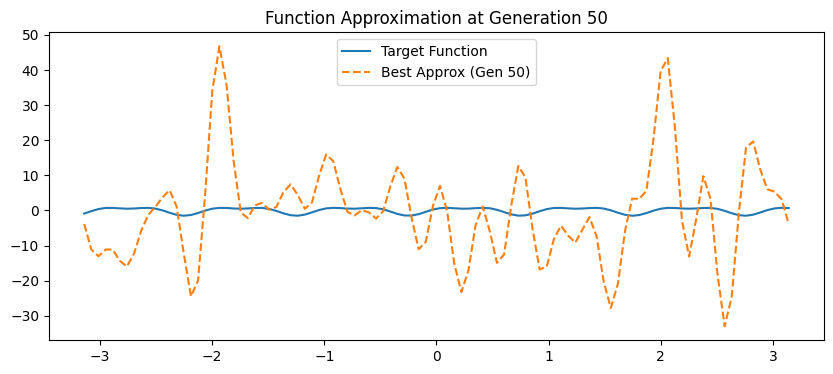

Generation 50: Best MSE = 204.971745, Avg MSE = 278.721416


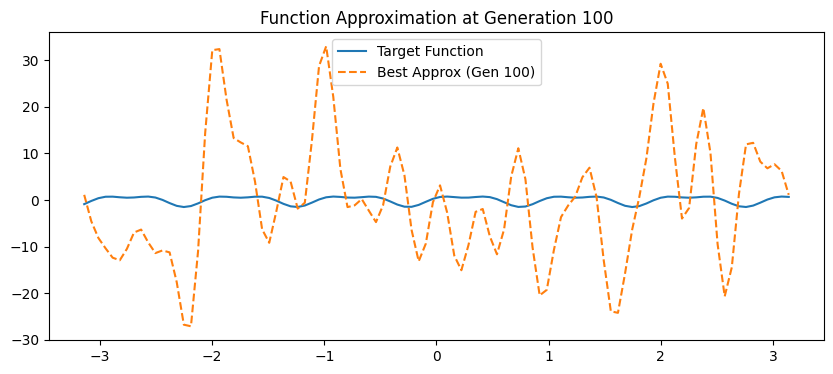

Generation 100: Best MSE = 169.030091, Avg MSE = 209.306419


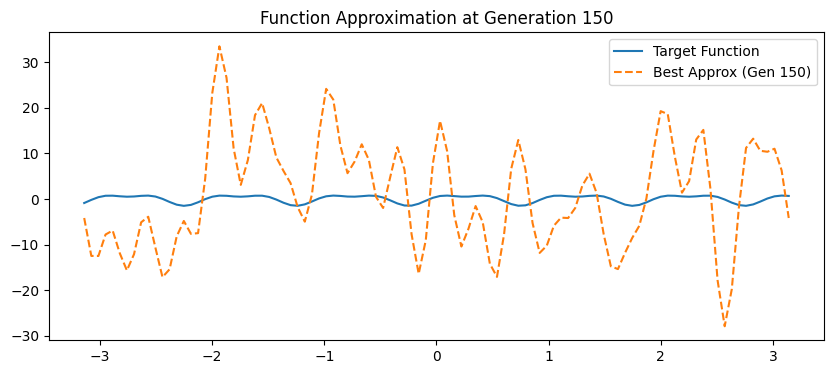

Generation 150: Best MSE = 137.419524, Avg MSE = 186.219680


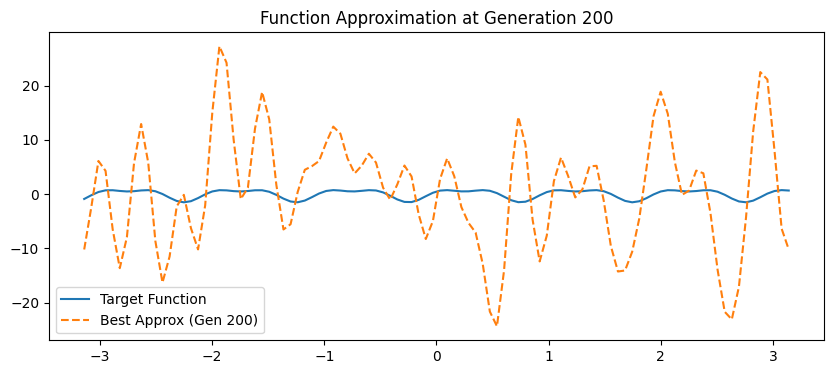

Generation 200: Best MSE = 107.174884, Avg MSE = 148.111517


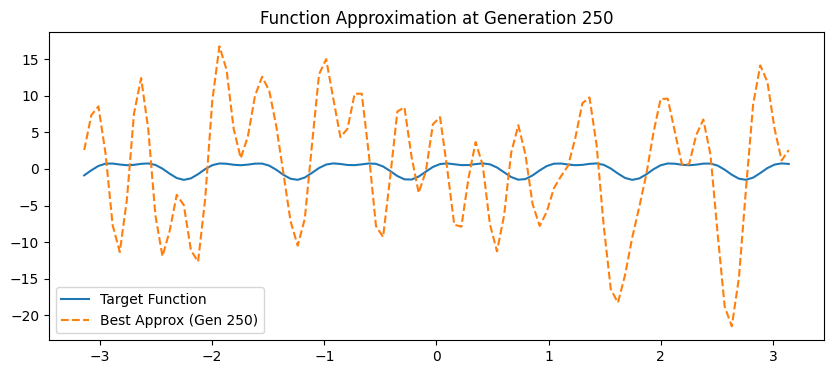

Generation 250: Best MSE = 67.321358, Avg MSE = 97.080663


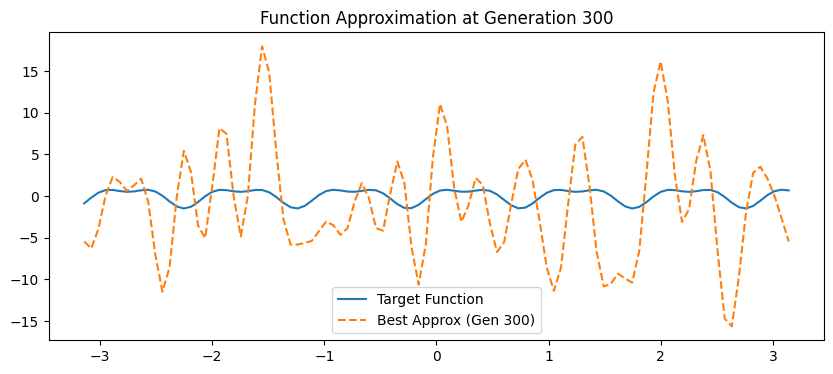

Generation 300: Best MSE = 41.706946, Avg MSE = 59.660429
-------------------------------------------------------------------- rank , multi , 0.15 --------------------------------------------------------------------


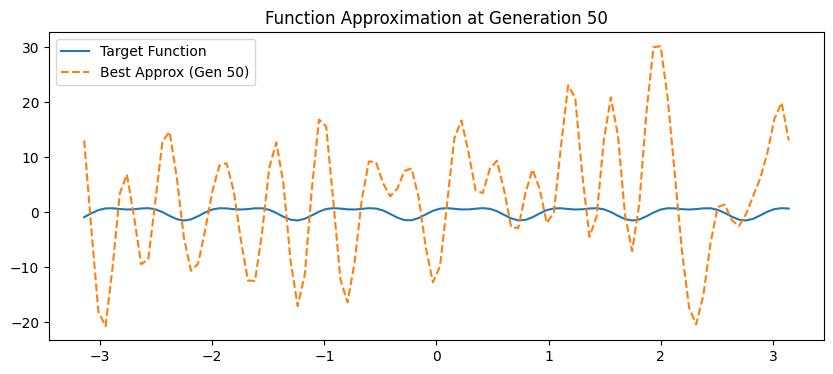

Generation 50: Best MSE = 124.456139, Avg MSE = 144.211076


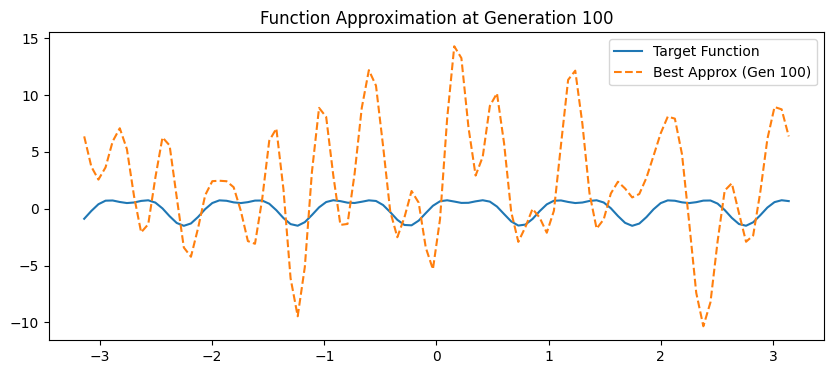

Generation 100: Best MSE = 28.143293, Avg MSE = 36.481877


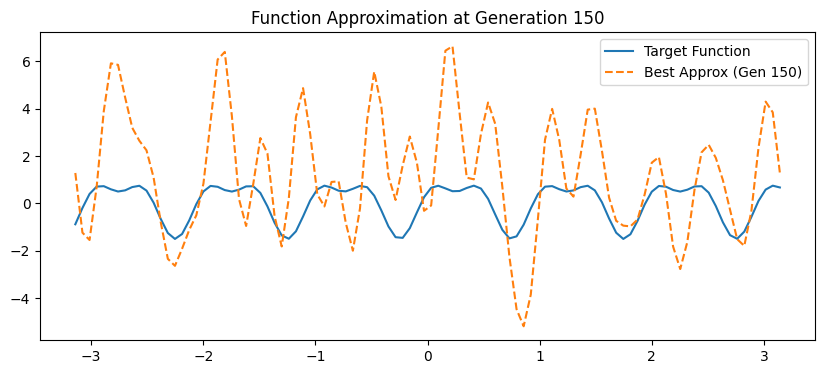

Generation 150: Best MSE = 6.558574, Avg MSE = 10.654100


KeyboardInterrupt: 

In [8]:
def fourier_approximation(coeffs, t):
    n_terms = (len(coeffs) - 1) // 2
    result = coeffs[0] / 2 #a0
    for i in range(1, n_terms + 1):
        a_i = coeffs[2*i - 1]
        b_i = coeffs[2*i]
        result += a_i * np.cos(i * t) + b_i * np.sin(i * t)
    return result

def calculate_fitness(individual, t_samples, fsamples):
    approx = fourier_approximation(individual, t_samples)
    mse = np.mean((approx - fsamples) ** 2)
    return mse

def roulette_wheel_selection(population, fitnesses, num_selected):
    #fitness is mse -> lower fitness -> better , so we use inverted fitness instead of reversing the fitness selection
    inverted_fitness = 1 / (np.array(fitnesses) + 1e-8)
    probabilities = inverted_fitness / np.sum(inverted_fitness)
    selected_indices = np.random.choice(len(population), size=num_selected, p=probabilities)
    return [population[i] for i in selected_indices]

def rank_based_selection(population, fitnesses, num_selected):
    #sort ascending
    sorted_indices = np.argsort(fitnesses)
    ranks = np.empty_like(sorted_indices)
    ranks[sorted_indices] = np.arange(len(fitnesses))
    # for i in range(len(sorted_indices) - 1):
    #     ranks.append(fitnesses[sorted_indices[i]])
    # Assign probabilities -> higher rank = higher probability
    probabilities = (len(fitnesses) - ranks) / np.sum(len(fitnesses) - ranks)
    selected_indices = np.random.choice(len(population), size=num_selected, p=probabilities)
    return [population[i] for i in selected_indices]


def best_fitness_selection(population, fitnesses, num_selected):
    sorted_indices = np.argsort(fitnesses)
    return [population[i] for i in sorted_indices[:num_selected]]



def single_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def multi_point_crossover(parent1, parent2, num_points=2):
    points = sorted(random.sample(range(1, len(parent1)), num_points))
    child1, child2 = parent1[:], parent2[:]
    
    x = 0
    last = 0
    points.append(len(parent1))
    for p in points:
        if x%2==0 :
            child1[last:p]  = child2[last:p]
            child2[last:p]  = child1[last:p]
        x += 1
        last = p
    return child1, child2

def uniform_crossover(parent1, parent2):
    child1, child2 = [], []
    for g1, g2 in zip(parent1, parent2):
        if random.random() < 0.5:
            child1.append(g1)
            child2.append(g2)
        else:
            child1.append(g2)
            child2.append(g1)
    return child1, child2


def mutate(individual, mutationRate=0.15, mutation_strength=0.5):
    return [
        gene + random.gauss(0, mutation_strength) if random.random() < mutationRate else gene
        for gene in individual
    ]


population = []
for _ in range(populationSize):
    coeffs = [random.uniform(-10, 10) for _ in range(numCoeffs)]
    population.append(coeffs)

def mainloop(sel='roulette' , ctype='single' , mutationRate = mutationRate , population = population):
    best_fitness_history = []
    avg_fitness_history = []
    best_individual = None
    best_fitness = float('inf')

    for generation in range(1, generations + 1):
        # Evaluate fitness
        fitnesses = [calculate_fitness(ind, tSamples, fSamples) for ind in population]
        best_idx = np.argmin(fitnesses)
        avg_fitness = np.mean(fitnesses)
        best_fitness_history.append(fitnesses[best_idx])
        avg_fitness_history.append(avg_fitness)
        
        if fitnesses[best_idx] < best_fitness:
            best_fitness = fitnesses[best_idx]
            best_individual = population[best_idx]
        
        # Visualization 
        if generation % 50 == 0 :
            plt.figure(figsize=(10, 4))
            plt.plot(tSamples, fSamples,label='Target Function')
            approx = fourier_approximation(best_individual, tSamples)
            plt.plot(tSamples, approx, '--', label=f'Best Approx (Gen {generation})')
            plt.title(f'Function Approximation at Generation {generation}')
            plt.legend()
            plt.show()
            print(f"Generation {generation}: Best MSE = {best_fitness:.6f}, Avg MSE = {avg_fitness:.6f}")

        # --- Selection ---
        num_selected = populationSize // 2
        if sel == "roulette" :
            selected = roulette_wheel_selection(population, fitnesses, num_selected)
        elif sel =="rank" : 
            selected = rank_based_selection(population, fitnesses, num_selected)
        else :
            selected = best_fitness_selection(population, fitnesses, num_selected)
            
        # --- Crossover and Mutation ---
        new_population = []
        while len(new_population) < populationSize:
            parent1 = random.choice(selected)
            parent2 = random.choice(selected)
            # crossover :
            
            if ctype == 'single':
                child1, child2 = single_point_crossover(parent1, parent2)
            elif ctype == 'multi':
                child1, child2 = multi_point_crossover(parent1, parent2, num_points=2)
            else:
                child1, child2 = uniform_crossover(parent1, parent2)
            
            # Mutate
            child1 = mutate(child1, mutationRate)
            child2 = mutate(child2, mutationRate)
            new_population.append(child1)
            if len(new_population) < populationSize:
                new_population.append(child2)
        population = new_population

print("-------------------------------------------------------------------- roulette , single , 0.15 --------------------------------------------------------------------")
mainloop()
print("-------------------------------------------------------------------- rank , multi , 0.15 --------------------------------------------------------------------")
mainloop("rank" , "multi")
print("-------------------------------------------------------------------- best , uni , 0.15 --------------------------------------------------------------------")
mainloop("best", "uni")

------------------- linear : best , uni , 0.15 -------------------


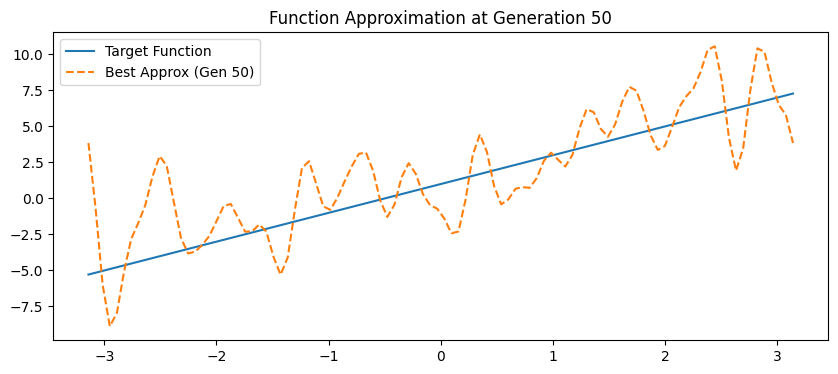

Generation 50: Best MSE = 6.716497, Avg MSE = 10.414891


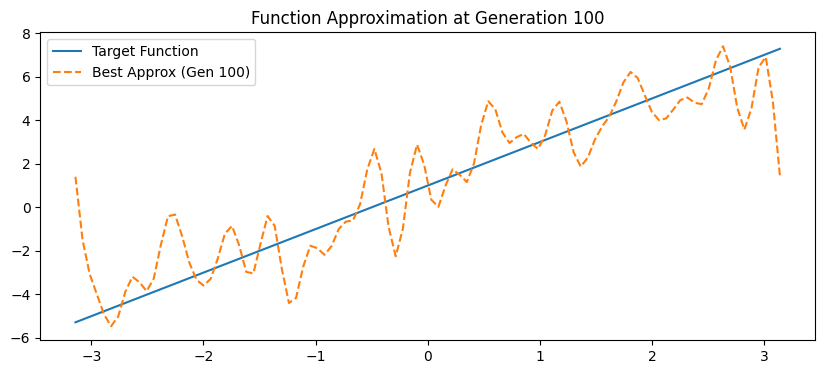

Generation 100: Best MSE = 2.656358, Avg MSE = 5.175339


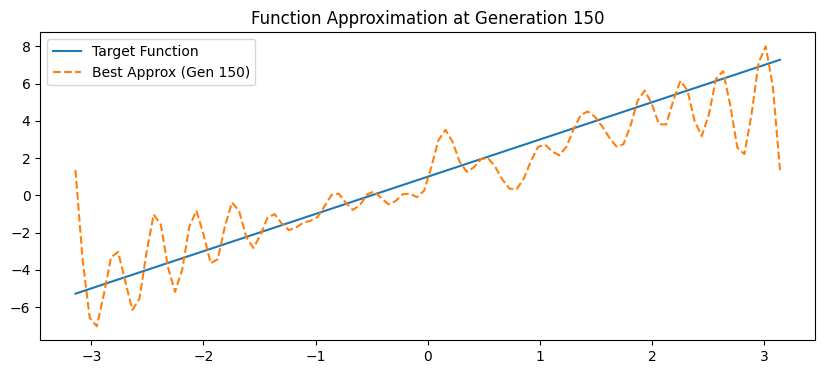

Generation 150: Best MSE = 2.440396, Avg MSE = 5.326558


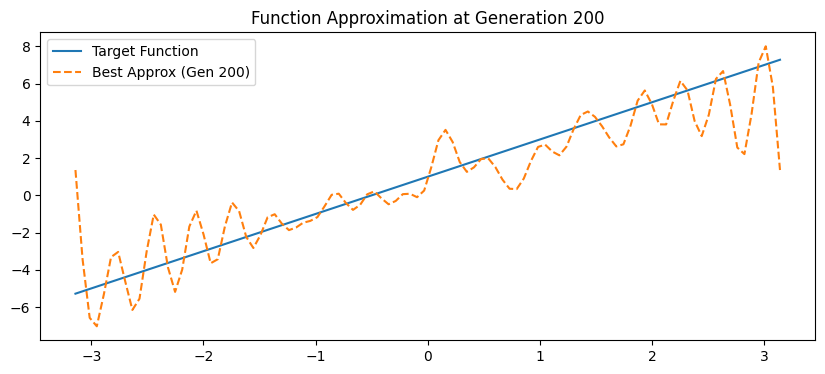

Generation 200: Best MSE = 2.440396, Avg MSE = 5.090787


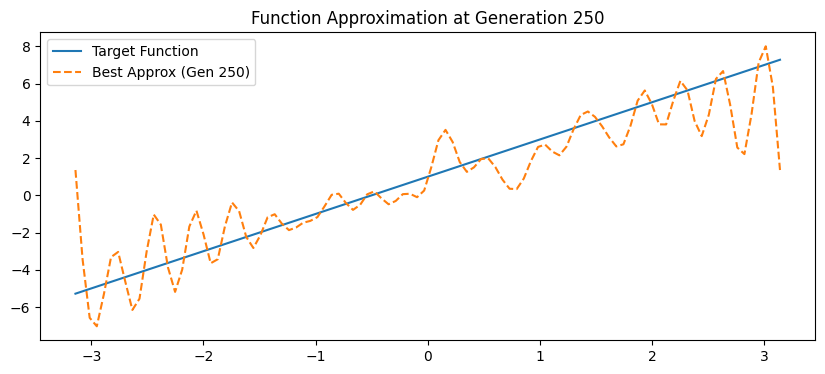

Generation 250: Best MSE = 2.440396, Avg MSE = 4.443967


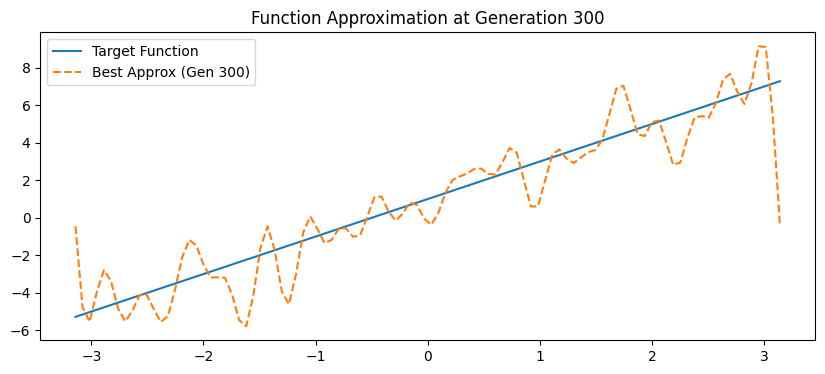

Generation 300: Best MSE = 2.345503, Avg MSE = 5.001962
------------------- quadratic : best , uni , 0.15 -------------------


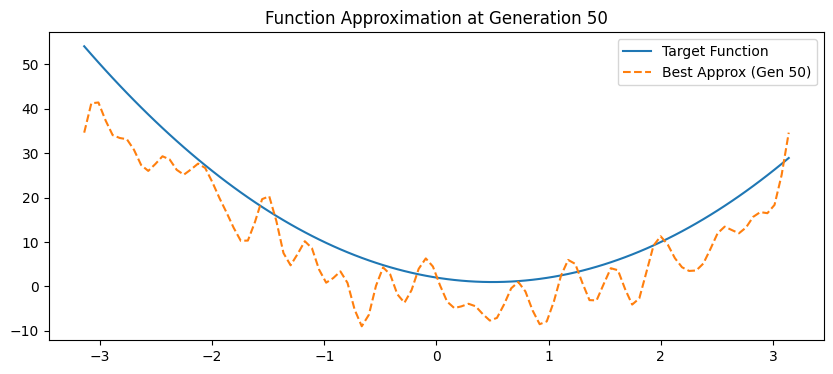

Generation 50: Best MSE = 54.578984, Avg MSE = 63.258833


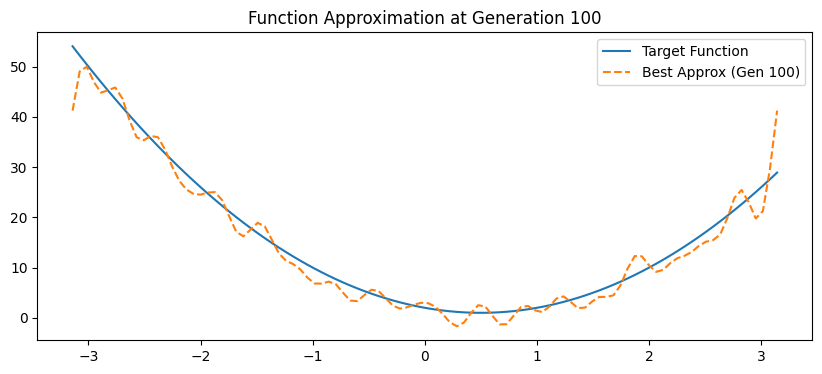

Generation 100: Best MSE = 6.764803, Avg MSE = 9.882150


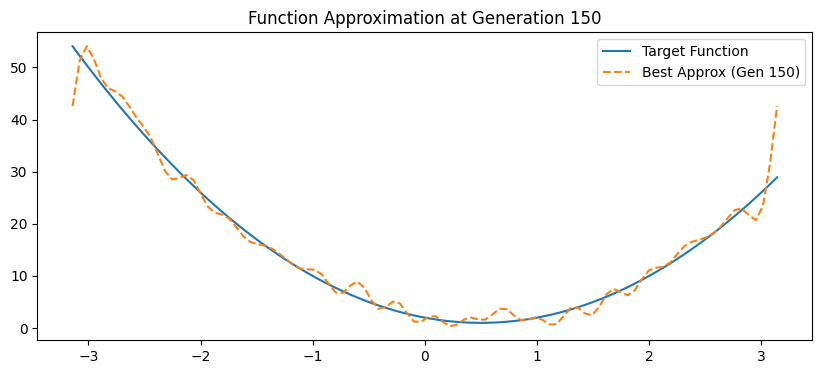

Generation 150: Best MSE = 5.236240, Avg MSE = 7.560260


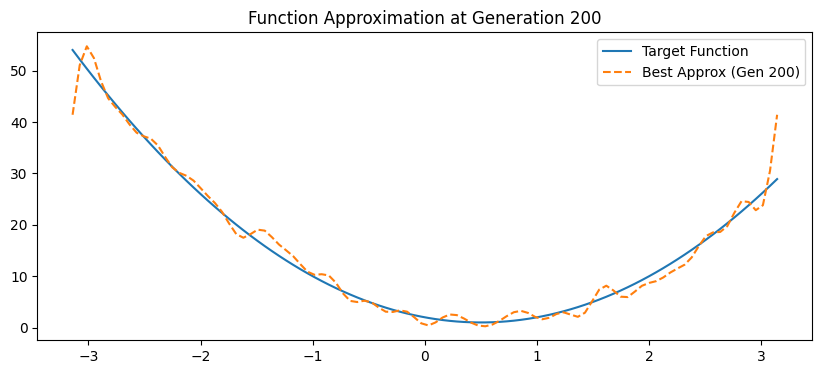

Generation 200: Best MSE = 5.016138, Avg MSE = 7.330681


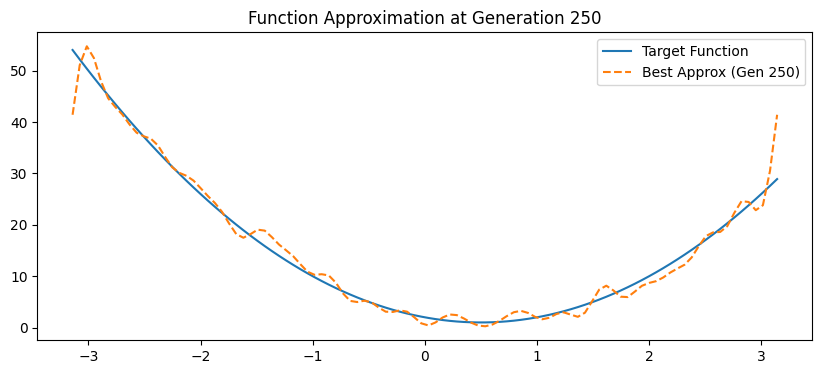

Generation 250: Best MSE = 5.016138, Avg MSE = 7.871637


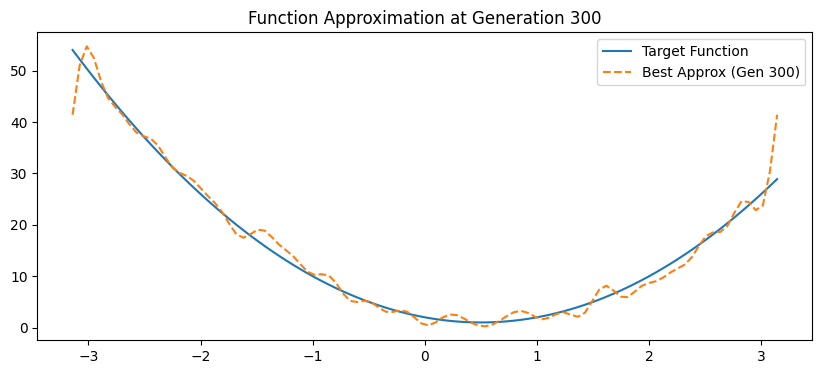

Generation 300: Best MSE = 5.016138, Avg MSE = 8.004406
------------------- cubic : best , uni , 0.15 -------------------


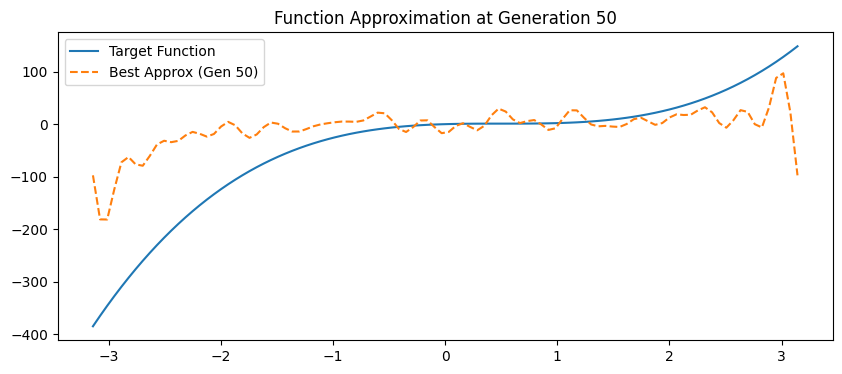

Generation 50: Best MSE = 8318.709708, Avg MSE = 8456.455839


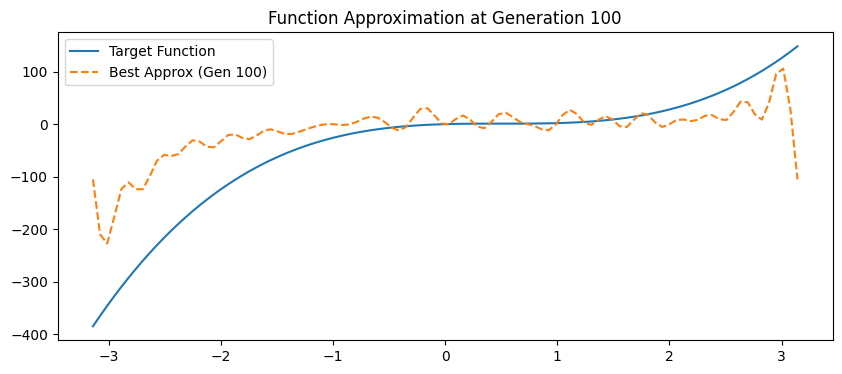

Generation 100: Best MSE = 6086.819178, Avg MSE = 6261.466096


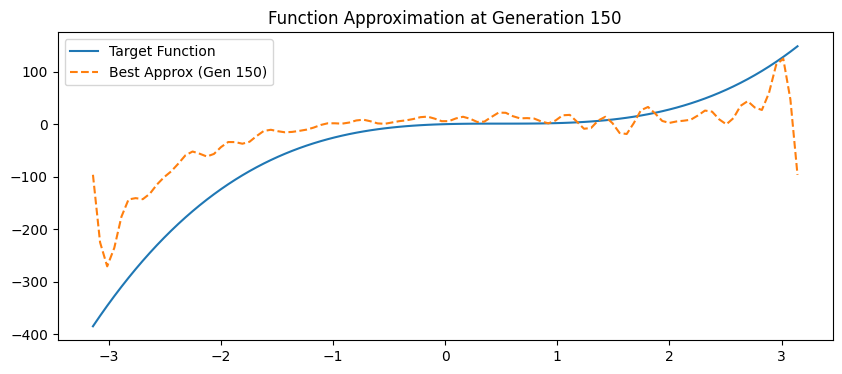

Generation 150: Best MSE = 4592.084726, Avg MSE = 4668.528621


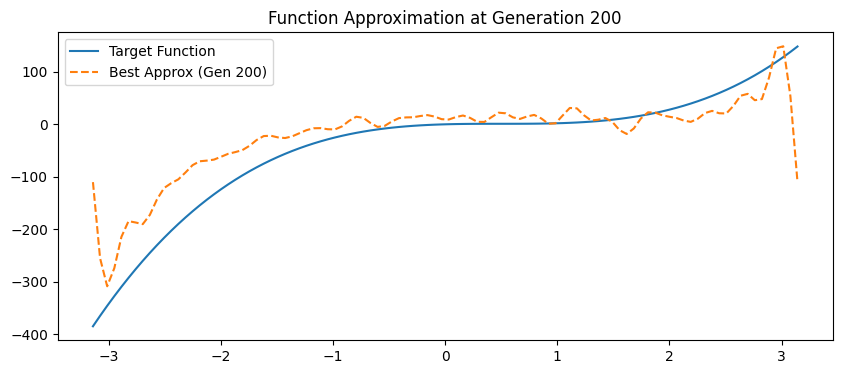

Generation 200: Best MSE = 3278.333215, Avg MSE = 3355.454932


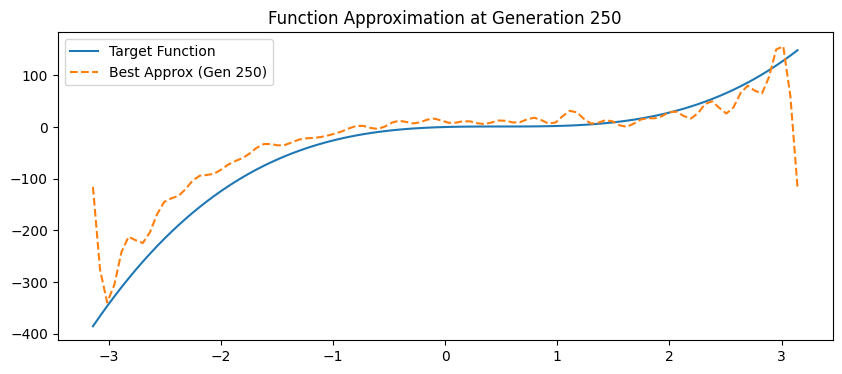

Generation 250: Best MSE = 2371.192474, Avg MSE = 2418.120950


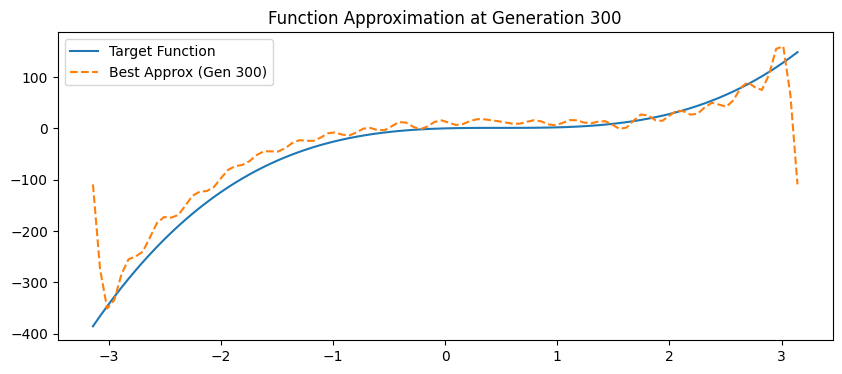

Generation 300: Best MSE = 1892.295679, Avg MSE = 1914.775487
------------------- gaussian : best , uni , 0.15 -------------------


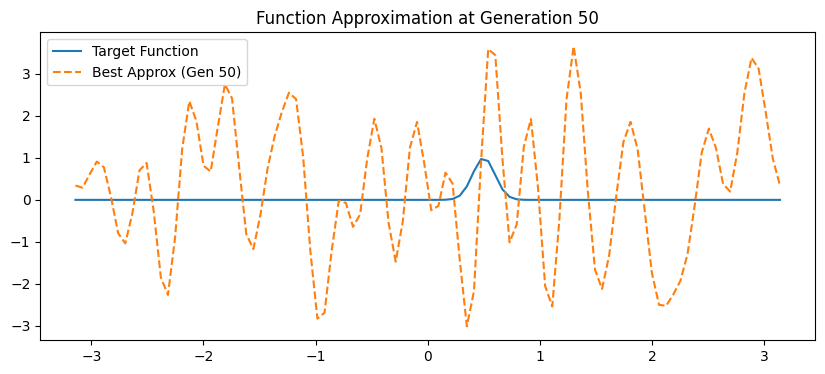

Generation 50: Best MSE = 2.625079, Avg MSE = 6.175484


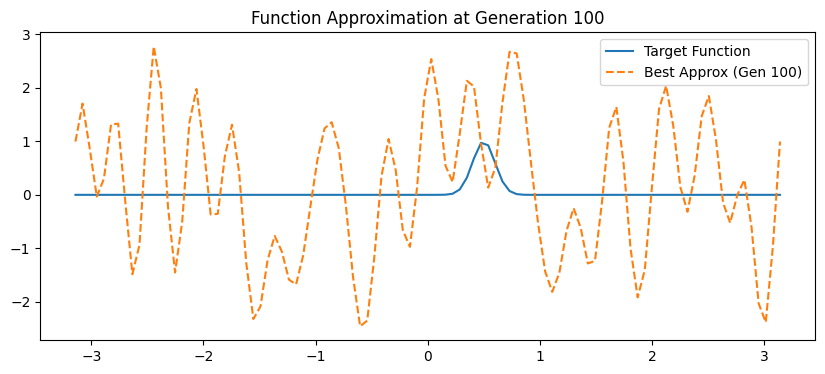

Generation 100: Best MSE = 1.701878, Avg MSE = 4.482292


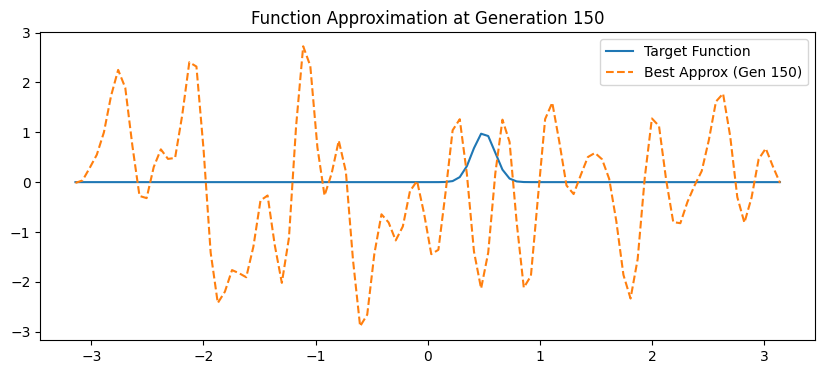

Generation 150: Best MSE = 1.661816, Avg MSE = 4.266588


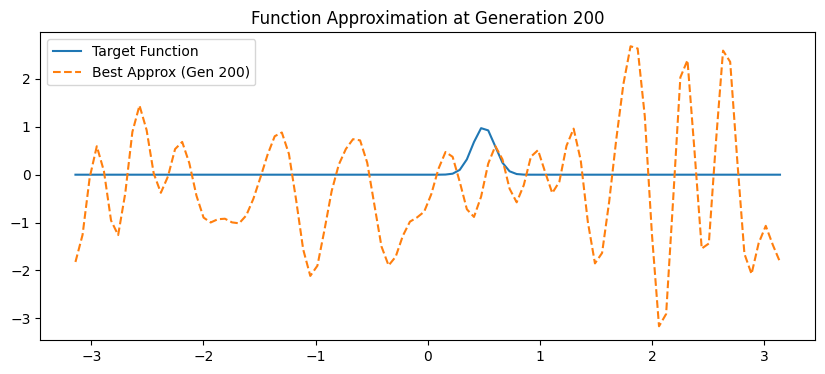

Generation 200: Best MSE = 1.474825, Avg MSE = 4.152259


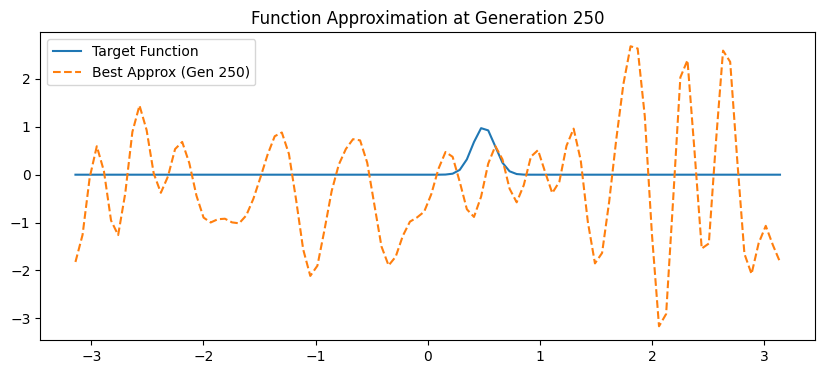

Generation 250: Best MSE = 1.474825, Avg MSE = 4.288841


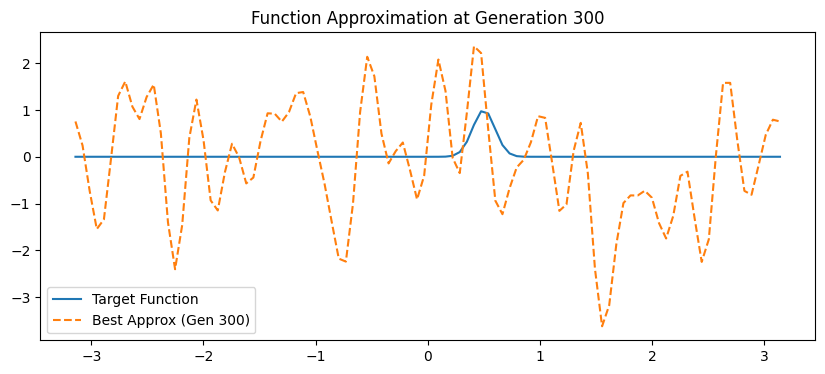

Generation 300: Best MSE = 1.436849, Avg MSE = 4.241435
------------------- square_wave : best , uni , 0.15 -------------------


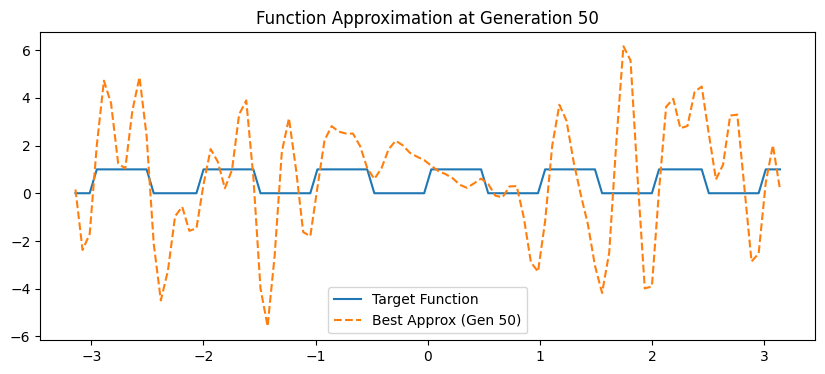

Generation 50: Best MSE = 5.004685, Avg MSE = 7.857407


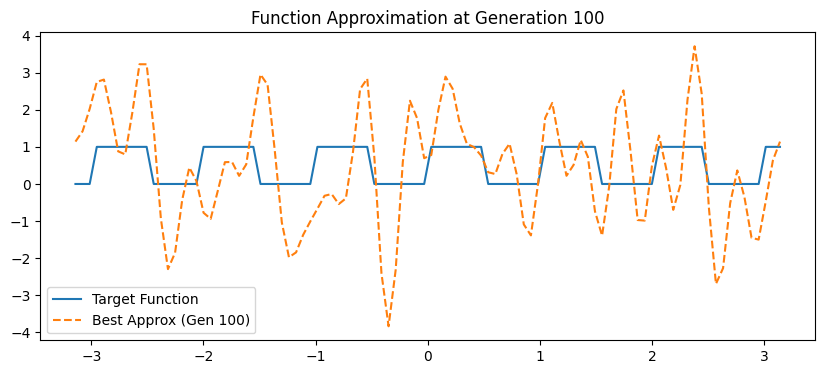

Generation 100: Best MSE = 1.965557, Avg MSE = 4.657887


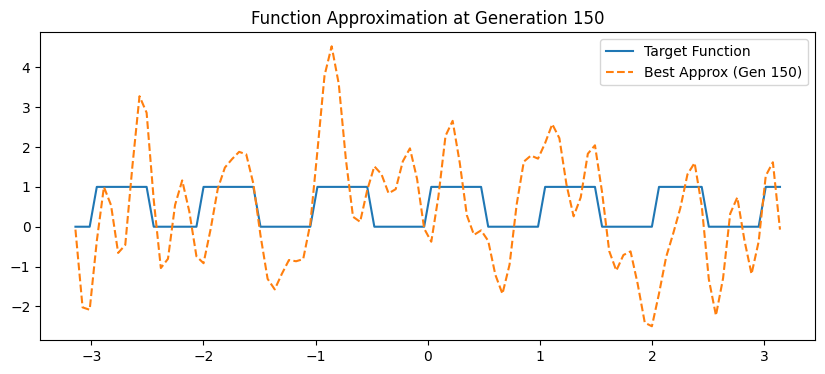

Generation 150: Best MSE = 1.608640, Avg MSE = 4.214597


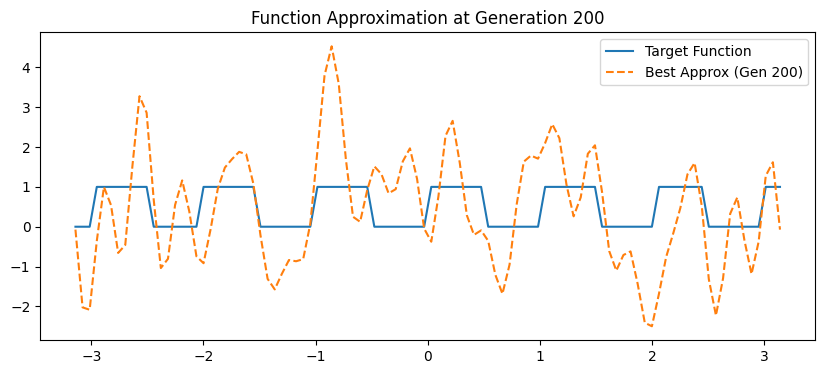

Generation 200: Best MSE = 1.608640, Avg MSE = 4.447693


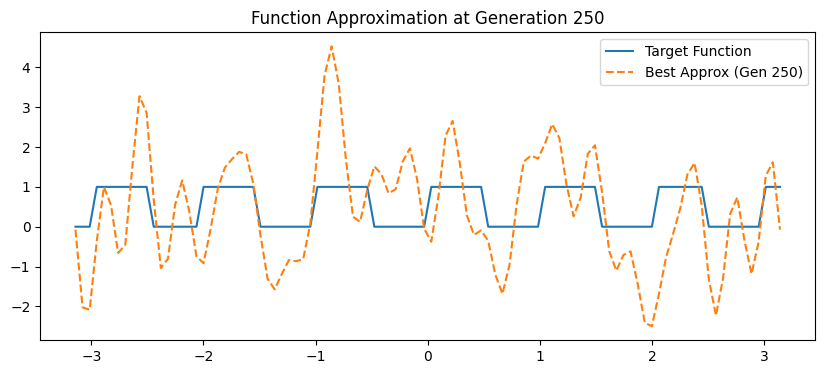

Generation 250: Best MSE = 1.608640, Avg MSE = 4.789577


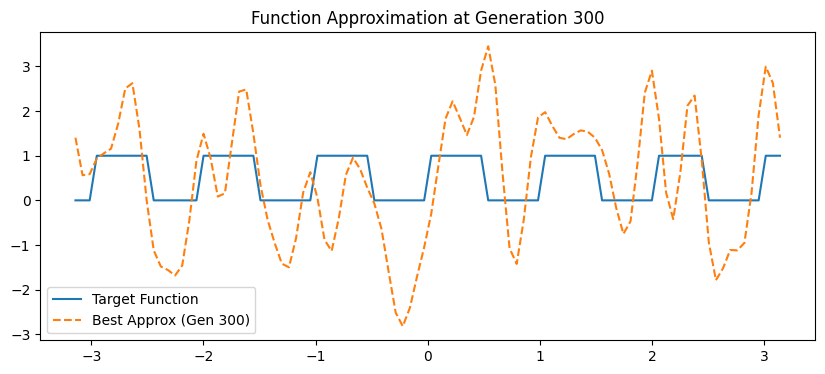

Generation 300: Best MSE = 1.561013, Avg MSE = 4.256193
------------------- sawtooth : best , uni , 0.15 -------------------


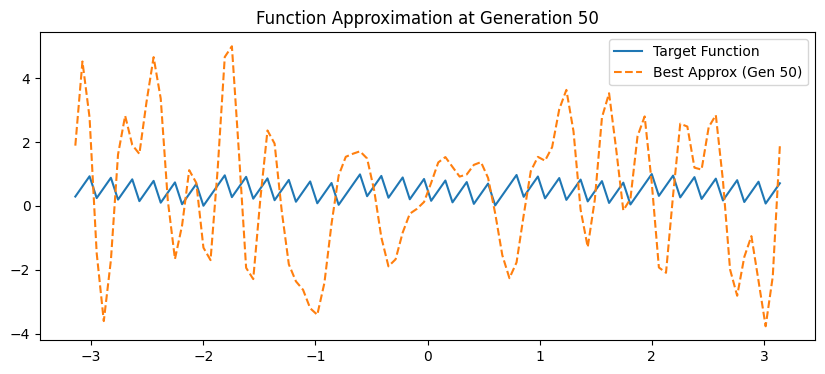

Generation 50: Best MSE = 4.104534, Avg MSE = 7.983119


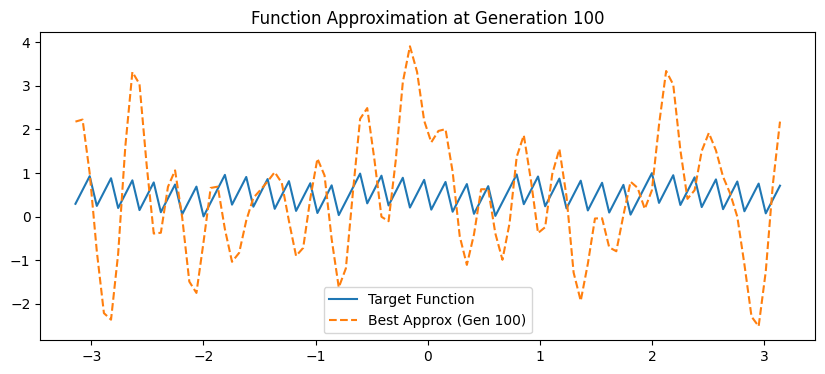

Generation 100: Best MSE = 1.916906, Avg MSE = 4.229313


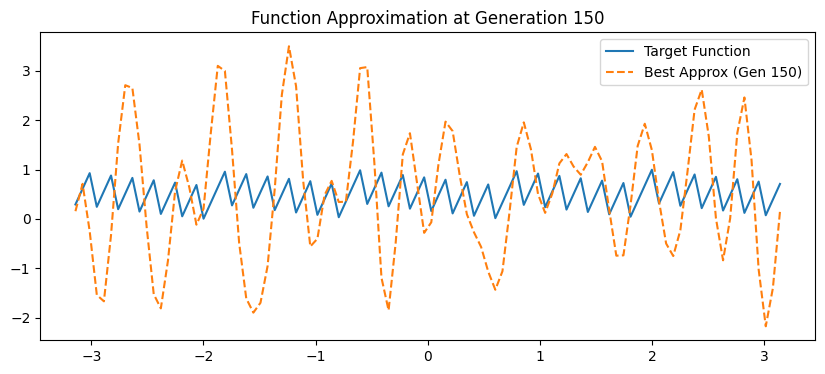

Generation 150: Best MSE = 1.787271, Avg MSE = 4.567291


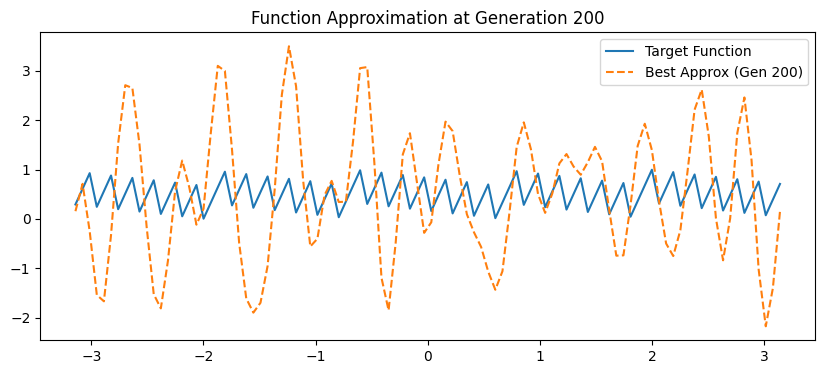

Generation 200: Best MSE = 1.787271, Avg MSE = 4.283580


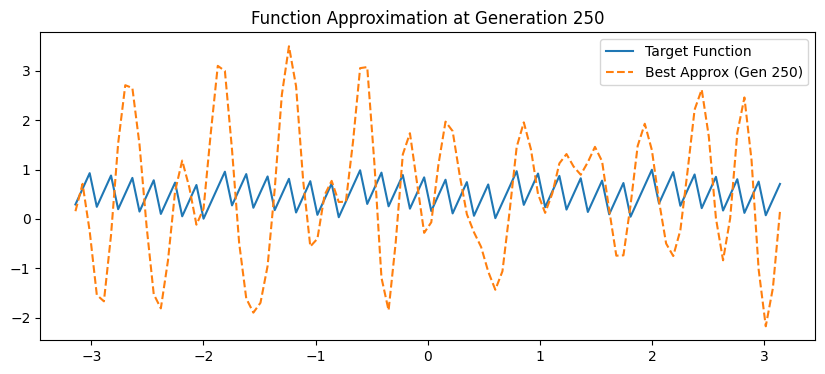

Generation 250: Best MSE = 1.787271, Avg MSE = 4.536237


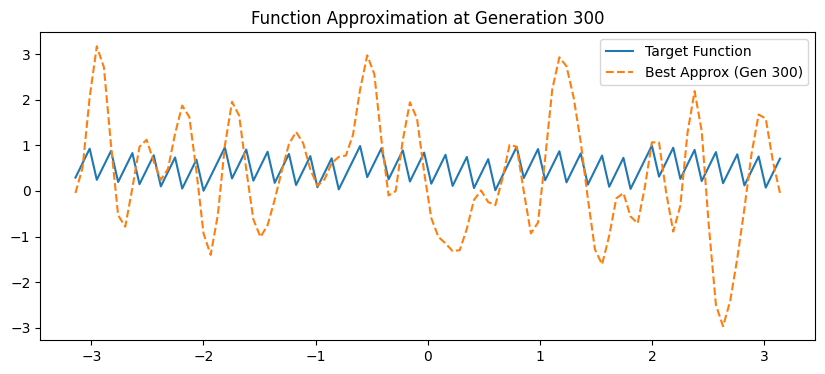

Generation 300: Best MSE = 1.574219, Avg MSE = 4.064530
------------------- complex_fourier : best , uni , 0.15 -------------------


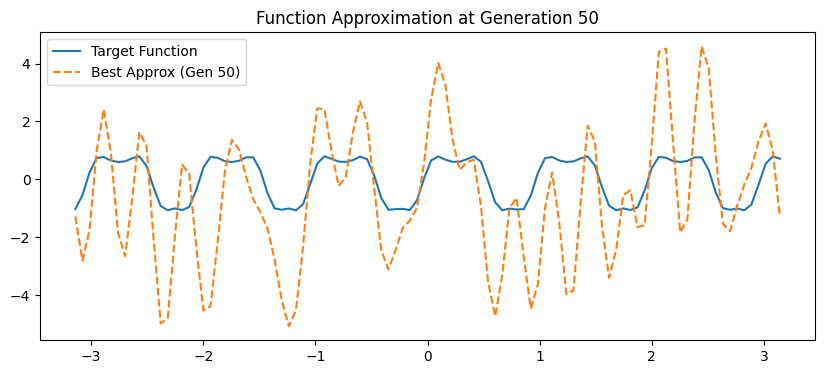

Generation 50: Best MSE = 4.428976, Avg MSE = 7.185332


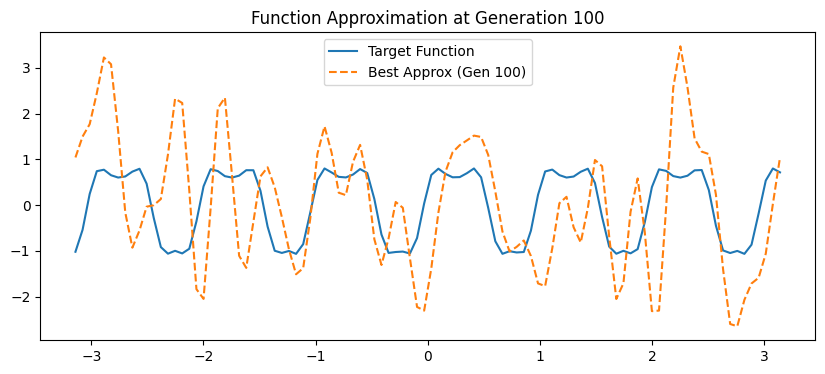

Generation 100: Best MSE = 1.842638, Avg MSE = 4.247139


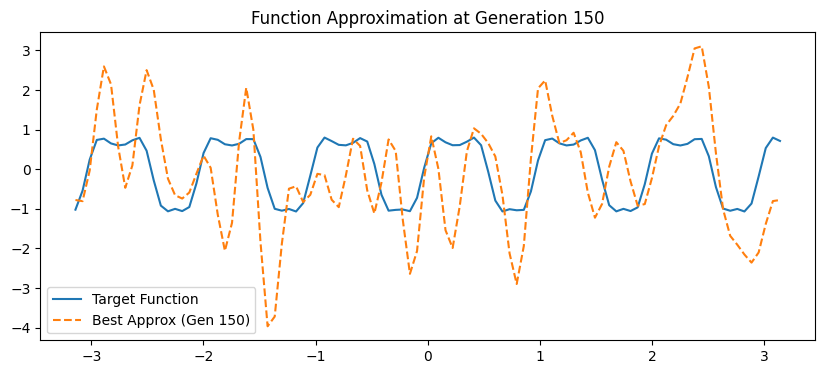

Generation 150: Best MSE = 1.620387, Avg MSE = 4.237320


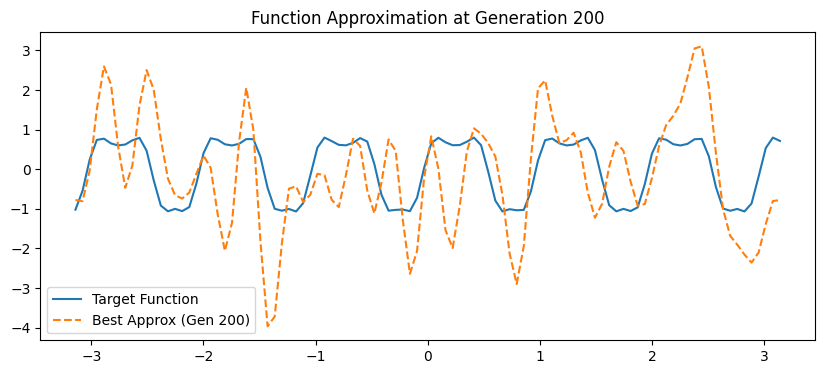

Generation 200: Best MSE = 1.620387, Avg MSE = 4.502924


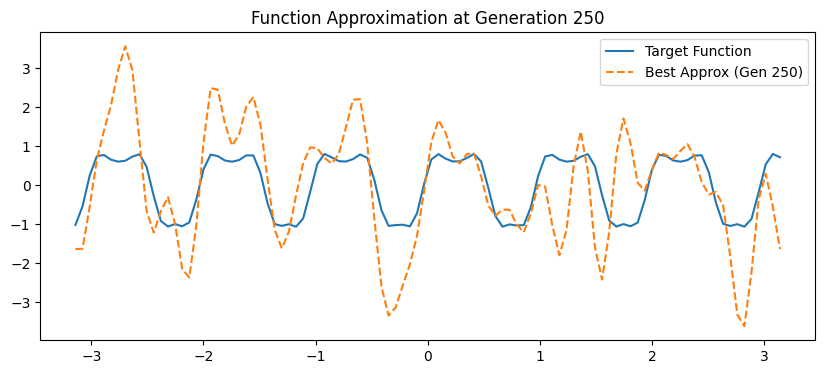

Generation 250: Best MSE = 1.362896, Avg MSE = 4.246796


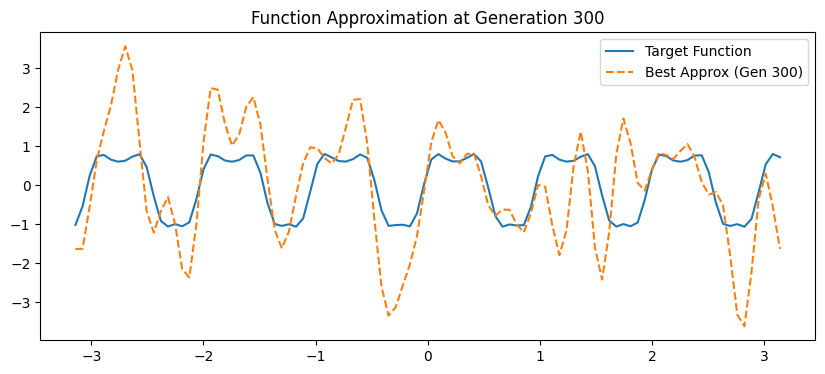

Generation 300: Best MSE = 1.362896, Avg MSE = 4.242147
------------------- polynomial : best , uni , 0.15 -------------------


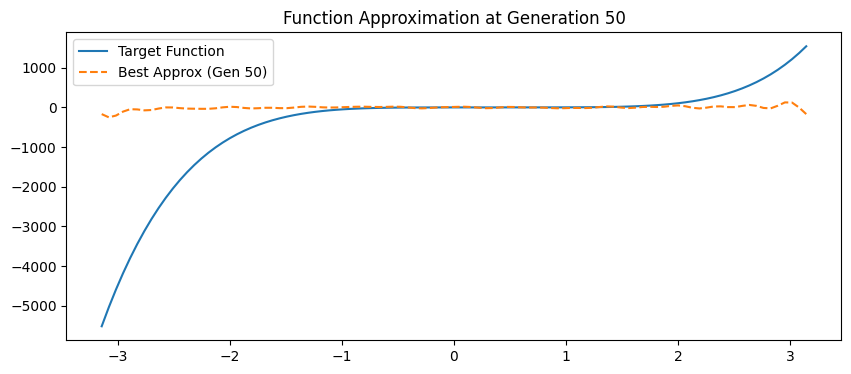

Generation 50: Best MSE = 1704887.579891, Avg MSE = 1708399.307137


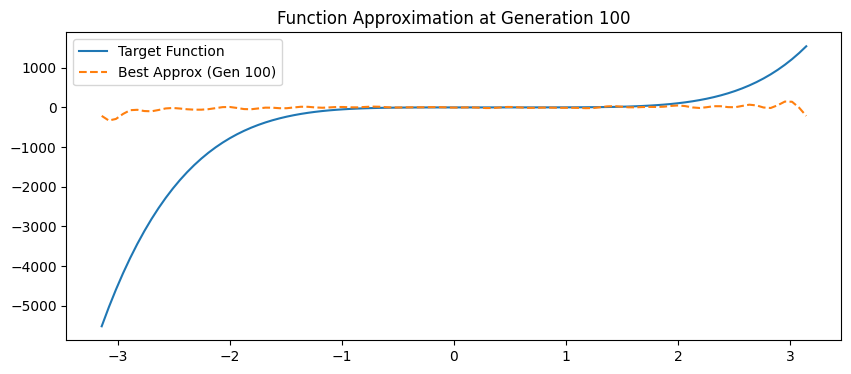

Generation 100: Best MSE = 1668293.128645, Avg MSE = 1670565.016071


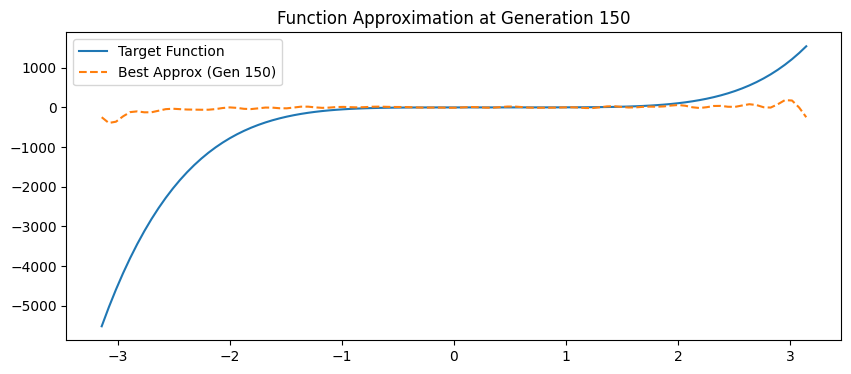

Generation 150: Best MSE = 1632720.143945, Avg MSE = 1635302.817754


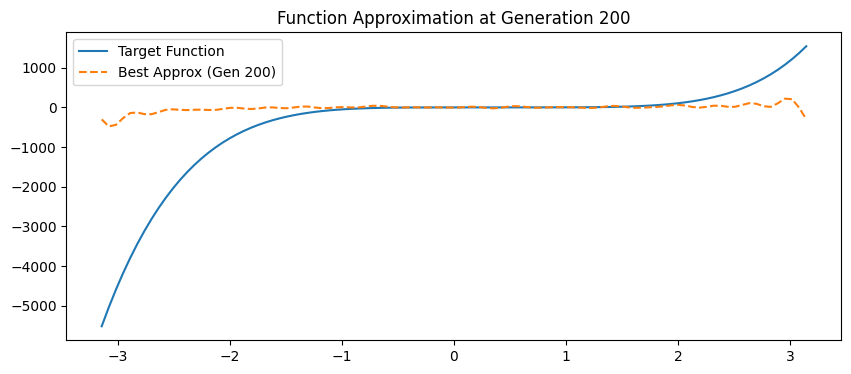

Generation 200: Best MSE = 1593518.126145, Avg MSE = 1595531.549108


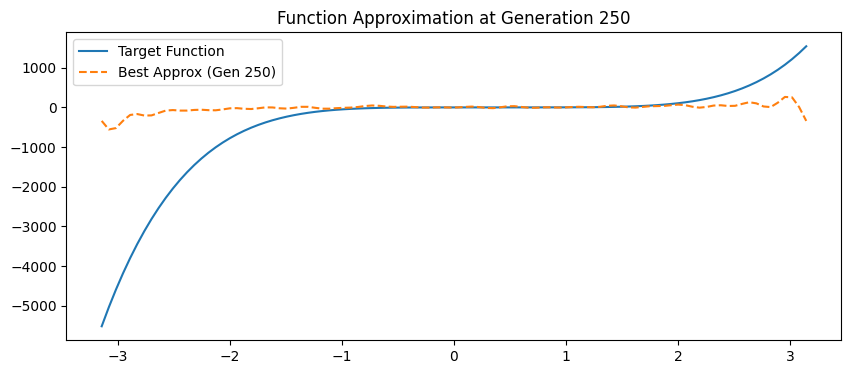

Generation 250: Best MSE = 1554612.374699, Avg MSE = 1556971.287795


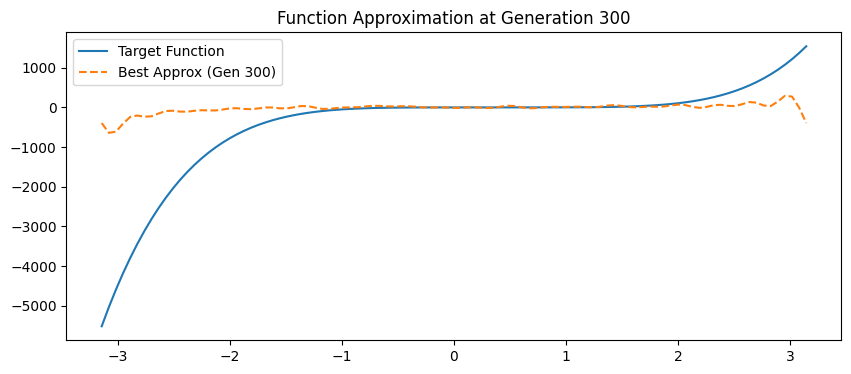

Generation 300: Best MSE = 1515228.190768, Avg MSE = 1517131.600590


In [ ]:
target_functions = [
    "linear",
    "quadratic",
    "cubic",
    "gaussian",
    "square_wave",
    "sawtooth",
    "complex_fourier",
    "polynomial"
]

for func_name in target_functions:
    print(f"------------------- {func_name} : best , uni , 0.15 -------------------")
    fSamples = getTargetFunction(func_name)(tSamples)
    mainloop("best", "uni")

# <span style="color: #3498db;">Minmax Algorithm</span>

In [9]:
import random
import numpy as np
from math import inf
import time
import pygame

pygame 2.6.1 (SDL 2.28.4, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [10]:
random.seed(1234)
class PentagoGame:
    def __init__(self, ui=False, print=False, depth=2):
        self.board = np.zeros((6, 6), dtype=int)
        self.current_player = 1
        self.ui = ui
        self.depth = depth
        self.nodes_visited = 0
        self.game_over = False
        self.result = None
        self.selected_block = None
        self.move_stage = 0  # 0: place piece, 1: select block, 2: rotate
        self.temp_piece = None
        self.print = print
        self.transposition_table = {}

        if ui:
            pygame.font.init()
            self.screen = pygame.display.set_mode((800, 600))
            pygame.display.set_caption("Pygame Board")
            # self.font = pygame.font.SysFont("Arial", 20)
            self.show_buttons = False
            self.buttons = {
                "rotate_cw": pygame.Rect(650, 200, 100, 50),
                "rotate_ccw": pygame.Rect(650, 300, 100, 50),
            }
            self.setup_controls()
            self.draw_board()

    def setup_controls(self):
        if self.show_buttons:
            pygame.draw.rect(self.screen, (144, 238, 144), self.buttons["rotate_cw"])   # Light Green
            pygame.draw.rect(self.screen, (173, 216, 230), self.buttons["rotate_ccw"])  # Light Blue

            self.screen.draw_text("CLOCKWISE", self.buttons["rotate_cw"].center)
            self.screen.draw_text("COUNTER-CLOCKWISE", self.buttons["rotate_ccw"].center)



    def hide_rotation_buttons(self):
        self.show_buttons = False

    def show_rotation_buttons(self):
        self.show_buttons = True

    def copy_board(self, board):
        return np.copy(board)

    def rotate_block(self, board, block, direction):
        row_start = (block // 2) * 3
        col_start = (block % 2) * 3
        sub = board[row_start : row_start + 3, col_start : col_start + 3]
        rotated = np.rot90(sub, 3 if direction == "cw" else 1)
        board[row_start : row_start + 3, col_start : col_start + 3] = rotated

    def get_possible_moves(self, board, player):
        moves = []
        for i in range(6):
            for j in range(6):
                if board[i][j] == 0:
                    for block in range(4):
                        for dir in ["cw", "ccw"]:
                            moves.append((i, j, block, dir))
        return moves

    def apply_move(self, board, move, player):
        new_board = self.copy_board(board)
        row, col, block, direction = move
        if new_board[row][col] != 0:
            return None
        new_board[row][col] = player
        self.rotate_block(new_board, block, direction)
        return new_board

    def check_winner(self, board):
        for i in range(6):
            for j in range(6):
                if board[i][j] == 0:
                    continue

                # Horizontal
                if j <= 1 and np.all(board[i, j : j + 5] == board[i][j]):
                    return board[i][j]

                # Vertical
                if i <= 1 and np.all(board[i : i + 5, j] == board[i][j]):
                    return board[i][j]

                # Diagonal
                if (
                    i <= 1
                    and j <= 1
                    and all(board[i + k][j + k] == board[i][j] for k in range(5))
                ):
                    return board[i][j]

                # Anti-diagonal
                if (
                    i <= 1
                    and j >= 4
                    and all(board[i + k][j - k] == board[i][j] for k in range(5))
                ):
                    return board[i][j]
        if np.all(board != 0):
            return 0
        return None
    def minimax(self, board=None, depth=None, maximizing=None, alpha=-float('inf') , beta =float('inf')):
    #def minimax(self, board=None, depth=None, maximizing=None):
        if self.game_over:
            return 0
        if board is None:
            board = self.board
        if depth is None:
            depth = self.depth
        if maximizing is None:
            maximizing = False  # this value is used for checking if we are now calculating for the player or the computer 
                            # so we would know that if we have to minimize or maximize


        # Transposition table lookup
        key = (str(board.tobytes()), depth, maximizing)
        if key in self.transposition_table:
            return self.transposition_table[key]

        winner = self.check_winner(board)
        if winner is not None:
            if winner == -1:
                return 10000  
            elif winner == 1:
                return -10000 
            else:
                return 0  

        if depth == 0:
            return PentagoGame.pentago_heuristic(board, -1)# we might reach the depth limit but still the game goes on 
                                                        # so we have to keep the last state evaluation

        self.nodes_visited += 1
        
        moves = self.get_possible_moves(board, -1 if maximizing else 1)
        if maximizing:
            max_eval = -float('inf')
            for move in moves:
                new_board = self.apply_move(board, move, -1)
                if new_board is None:
                    continue
                #eval = self.minimax(new_board, depth-1, False )
                eval = self.minimax(new_board, depth-1, False , alpha , beta)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if (beta <= alpha): break
            self.transposition_table[key] = max_eval
            return max_eval
        else:
            min_eval = float('inf')
            for move in moves:
                new_board = self.apply_move(board, move, 1)
                if new_board is None:
                    continue
                #eval = self.minimax(new_board, depth-1, True) 
                eval = self.minimax(new_board, depth-1, True, alpha , beta)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if (beta <= alpha): break
            self.transposition_table[key] = min_eval            
            return min_eval
    
    def get_computer_move(self):
        start_time = time.time()
        best_move = None
        best_value = -inf
        
        moves = self.get_possible_moves(self.board, -1)
        if not moves:
            return None
        best_move = moves[0]

        for move in moves:
            if self.game_over:
                break
            new_board = self.apply_move(self.board, move, -1)
            if new_board is None:
                continue

            try:
                # value = self.minimax(new_board, self.depth-1, True)
                value = self.minimax(new_board, self.depth-1, True, alpha=-float('inf'), beta=float('inf'))
                
            except:
                value = -inf

            if value > best_value:
                best_value = value
                best_move = move

        if self.print == True:
            print(f"Move took {time.time()-start_time:.2f}s, nodes visited: {self.nodes_visited}")
        self.nodes_visited = 0
        return best_move

    def draw_text(self, text, center_pos, max_width):
        font_size = 24
        font = pygame.font.Font(None, font_size)
        text_surface = font.render(text, True, (0, 0, 0))

        text_width = text_surface.get_width()
        if text_width > max_width:
            scale_factor = max_width / text_width
            new_font_size = int(font_size * scale_factor)
            font = pygame.font.Font(None, new_font_size)
            text_surface = font.render(text, True, (0, 0, 0))

        text_rect = text_surface.get_rect(center=center_pos)
        self.screen.blit(text_surface, text_rect)

    def draw_board(self):
        self.screen.fill((0, 0, 0))

        for i in range(6):
            for j in range(6):
                x0 = j * 100
                y0 = i * 100

                if self.board[i][j] == 1:
                    pygame.draw.circle(self.screen, (255, 0, 0), (x0 + 50, y0 + 50), 40)
                elif self.board[i][j] == -1:
                    pygame.draw.circle(self.screen, (0, 0, 255), (x0 + 50, y0 + 50), 40)

                pygame.draw.rect(self.screen, (255, 255, 255), (x0, y0, 100, 100), 1)

        for i in [3, 6]:
            pygame.draw.line(self.screen, (255, 255, 255), (0, i * 100), (600, i * 100), 3)  # Horizontal
            pygame.draw.line(self.screen, (255, 255, 255), (i * 100, 0), (i * 100, 600), 3)  # Vertical

        # Show rotation buttons if in move_stage 2
        if self.move_stage == 2:
            self.highlight_selected_block()
            self.show_rotation_buttons()

        if self.show_buttons:
            pygame.draw.rect(self.screen, (144, 238, 144), self.buttons["rotate_cw"])  # Light Green
            pygame.draw.rect(self.screen, (173, 216, 230), self.buttons["rotate_ccw"])  # Light Blue

            self.draw_text(
                "CLOCKWISE",
                self.buttons["rotate_cw"].center,
                self.buttons["rotate_cw"].width,
            )
            self.draw_text(
                "COUNTER-CLOCKWISE",
                self.buttons["rotate_ccw"].center,
                self.buttons["rotate_ccw"].width,
            )

    def click_handler(self, event):
        if self.game_over or self.current_player != 1:
            return

        x, y = event.pos
        if self.move_stage == 0:  # Place piece
            if x > 600:
                return  # clicks on control area
            col = x // 100
            row = y // 100
            if 0 <= row < 6 and 0 <= col < 6 and self.board[row][col] == 0:
                self.temp_piece = (row, col)
                self.board[row][col] = 1
                self.move_stage = 1
                self.draw_board()

        elif self.move_stage == 1:  # Select block
            if x > 600:
                return
            # which block was clicked
            block_x = 0 if x < 300 else 1
            block_y = 0 if y < 300 else 1
            self.selected_block = block_y * 2 + block_x
            self.move_stage = 2
            self.show_rotation_buttons()
            self.highlight_selected_block()

        elif self.move_stage == 2:  # Rotate
            if self.buttons["rotate_cw"].collidepoint(event.pos):
                self.apply_rotation("cw")
            if self.buttons["rotate_ccw"].collidepoint(event.pos):
                self.apply_rotation("ccw")

    def apply_rotation(self, direction):
        self.rotate_block(self.board, self.selected_block, direction)
        self.current_player = -1
        self.move_stage = 0
        self.selected_block = None
        self.temp_piece = None
        self.hide_rotation_buttons()
        self.draw_board()
        pygame.display.flip()
        self.check_game_over()
        pygame.time.delay(1000)
        self.play_computer_move()

    def highlight_selected_block(self):
        colors = [
            (255, 153, 153),
            (153, 255, 153),
            (153, 153, 255),
            (255, 255, 153),
        ]  # RGB colors

        row_start = (self.selected_block // 2) * 3
        col_start = (self.selected_block % 2) * 3

        pygame.draw.rect(
            self.screen,
            colors[self.selected_block],
            (col_start * 100, row_start * 100, 300, 300),
            5,
        )

    def play_computer_move(self):
        move = self.get_computer_move()
        if move and not self.game_over:
            new_board = self.apply_move(self.board, move, -1)
            if new_board is not None:
                self.board = new_board
                self.current_player = 1
                self.draw_board()
                pygame.display.flip()
                self.check_game_over()
            else:
                print("Invalid computer move!")

    def check_game_over(self):
        winner = self.check_winner(self.board)
        if winner is not None:
            self.game_over = True
            self.result = winner
            print("Game over! Result:", winner)
            if self.ui:
                self.show_game_over_message()

    def show_game_over_message(self):
        self.screen.fill((200, 200, 200))
        pygame.draw.rect(self.screen, (255, 255, 255), (100, 200, 500, 200))
        pygame.draw.rect(self.screen, (0, 0, 0), (100, 200, 500, 200), 3)

        result_text = f"Player {self.result} wins!" if self.result != 0 else "Draw!"
        text_surface = self.font_large.render(result_text, True, (255, 0, 0))
        self.screen.blit(text_surface, (250, 250))

        exit_text = self.font_small.render("Click anywhere to exit", True, (0, 0, 0))
        self.screen.blit(exit_text, (230, 350))
        pygame.display.flip()

    def play(self):
        if self.ui:
            running = True
            while running:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        running = False
                    elif event.type == pygame.MOUSEBUTTONDOWN:
                        self.click_handler(event)
                self.draw_board()
                pygame.display.flip()
            pygame.quit()
            return self.result
        else:
            while not self.game_over:
                self.print_board()
                winner = self.check_winner(self.board)
                if winner is not None:
                    return winner

                if self.current_player == 1:
                    move = random.choice(self.get_possible_moves(self.board, 1))
                else:
                    move = self.get_computer_move()

                self.board = self.apply_move(self.board, move, self.current_player)
                self.current_player *= -1
            return self.result

    def print_board(self):
        if self.print == False:
            return
        print("-" * 25)
        for row in self.board:
            print(" ".join(f"{x:2}" for x in row))
        print("-" * 25)


    def pentago_heuristic(board, player):
    # heuristic idea : how many lines we have of lines 2 ,3 ,4 giving each a weight (4 highest then 3 , ...) ,
    #  same for computer then we get diffrence
        lines = []
        my_score = 0  
        opp_score = 0
        opp = -player  
            
        # Horizontal lines
        for i in range(6):
            for j in range(2):
                lines.append([(i, j+k) for k in range(5)])
        
        # Vertical lines
        for i in range(2):
            for j in range(6):
                lines.append([(i+k, j) for k in range(5)])
        
        # Diagonal lines
        for i in range(2):
            for j in range(2):
                lines.append([(i+k, j+k) for k in range(5)])
        
        # Anti-diagonal
        for i in range(2):
            for j in range(4, 6):
                lines.append([(i+k, j-k) for k in range(5)])
        
        
        for line in lines:
            line_values = [board[i][j] for i, j in line]
            
            player_count = line_values.count(player)
            empty_count = line_values.count(0)
            
            if player_count > 0 and player_count + empty_count == len(line):
                if player_count == 4:
                    my_score += 10
                elif player_count == 3:
                    my_score += 3
                elif player_count == 2:
                    my_score += 1
            
            opp_count = line_values.count(opp)
            empty_count = line_values.count(0)
            
            if opp_count > 0 and opp_count + empty_count == len(line):
                if opp_count == 4:
                    opp_score += 10
                elif opp_count == 3:
                    opp_score += 3
                elif opp_count == 2:
                    opp_score += 1
                    
        return my_score - opp_score

In [ ]:
numGames = 5
numWins, numTies, numLosses = 0, 0, 0
for i in range(numGames):
    game = PentagoGame(ui=False, print=True, depth=2)  # depth=2 for faster
    result = game.play()
    #game.print_board()
    if result == -1:
        numWins += 1
    elif result == 0:
        numTies += 1
    else:
        numLosses += 1

print(f"{numWins} wins, {numTies} ties, {numLosses} losses")

-------------------------
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
-------------------------
Move took 1.89s, nodes visited: 35
-------------------------
 0  0 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0 -1  0  0  0
 0  0  1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
-------------------------
Move took 5.20s, nodes visited: 99
-------------------------
 0  0  0  0  0  0
 0  0 -1  0  0  0
 0  1 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
-------------------------
-------------------------
 1  0  0  0  0  0
 0  0 -1  0  0  0
 0  1 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0